# How close are previous algorithms to the smallest possible sample size and how much closer can we get with SampLNS

We don't know the actual smallest possible sample sizes, but we have a lower bound that we can use.


Let us first load the data from the experiment with solved each of the 44 small to medium instance 5 times with each of the previous algorithms. Then these samples were optimized for 900s by SampLNS.

In [18]:
import pandas as pd

In [19]:
from _conf import EXTENDED_BASELINE_DATA, PREPROCESSED_RESULTS

samplns_data = pd.read_json(PREPROCESSED_RESULTS)
baseline_data = pd.read_json(EXTENDED_BASELINE_DATA)

In [20]:
best_lower_bound = (
    samplns_data.groupby(["instance_name"])["lower_bound"]
    .max()
    .reset_index()
    .rename(columns={"lower_bound": "best_lower_bound"})
)
# best_lower_bound.to_json("./out/07_best_lower_bounds.json.zip")
best_lower_bound

,instance_name,best_lower_bound
0,APL,7
1,APL-Model,8
2,BankingSoftware,28
3,BattleofTanks,256
4,ChatClient,7
5,DMIE,16
6,E-Shop,8
7,EMBToolkit,1872
8,FameDB,8
9,FeatureIDE,7


In [21]:
# Fetch external lower bounds, that might be better than the ones we have.
best_lower_bound["internal_best"] = best_lower_bound["best_lower_bound"]
from _conf import EXTERNAL_BOUNDS

external_best_lb = (
    pd.concat([pd.read_csv(p) for p in EXTERNAL_BOUNDS])
    .groupby(["instance_name"])["best_lower_bound"]
    .max()
    .reset_index()
)
best_lower_bound = (
    pd.concat([best_lower_bound, external_best_lb])
    .groupby(["instance_name"])[["best_lower_bound", "internal_best"]]
    .max()
    .reset_index()
)
best_lower_bound

,instance_name,best_lower_bound,internal_best
0,APL,7,7.0
1,APL-Model,8,8.0
2,BankingSoftware,28,28.0
3,BattleofTanks,256,256.0
4,ChatClient,7,7.0
5,DMIE,16,16.0
6,E-Shop,10,8.0
7,EMBToolkit,1872,1872.0
8,FameDB,8,8.0
9,FeatureIDE,7,7.0


In [22]:
samplns_data = samplns_data[
    ["instance_name", "lower_bound", "upper_bound", "baseline_alg", "baseline_alg_conf"]
]
samplns_data = samplns_data.merge(best_lower_bound, on="instance_name")
# How many percent is the solution above the best lower bound?
samplns_data["gap"] = 100 * (
    samplns_data["upper_bound"] / samplns_data["best_lower_bound"] - 1
)
samplns_data["algorithm_name"] = "SampLNS"
samplns_data.groupby(["instance_name", "baseline_alg", "baseline_alg_conf"])[
    ["lower_bound", "upper_bound", "gap"]
].mean()

lower_bound  \
instance_name              baseline_alg baseline_alg_conf                
APL                        FIDE-YASA    t2_m10_null                7.0   
                                        t2_m1_null                 7.0   
                           Incling      t2                         7.0   
APL-Model                  FIDE-YASA    t2_m10_null                8.0   
                                        t2_m1_null                 8.0   
...                                                                ...   
uclibc_2008-06-05_13-46-47 FIDE-YASA    t2_m1_null               504.6   
                           Incling      t2                       505.0   
uclibc_2020-12-24_11-54-53 FIDE-YASA    t2_m10_null              365.0   
                                        t2_m1_null               364.4   
                           Incling      t2                       365.0   

                                                           upper_bound  \
instance_name              baseline_alg baseline_alg_conf                
APL                        FIDE-YASA    t2_m10_null                7.0   
                                        t2_m1_null                 7.0   
                           Incling      t2                         7.0   
APL-Model                  FIDE-YASA    t2_m10_null                8.0   
                                        t2_m1_null                 8.0   
...                                                                ...   
uclibc_2008-06-05_13-46-47 FIDE-YASA    t2_m1_null               505.0   
                           Incling      t2                       508.0   
uclibc_2020-12-24_11-54-53 FIDE-YASA    t2_m10_null              365.0   
                                        t2_m1_null               365.0   
                           Incling      t2                       366.0   

                                                                gap  
instance_name              baseline_alg baseline_alg_conf            
APL                        FIDE-YASA    t2_m10_null        0.000000  
                                        t2_m1_null         0.000000  
                           Incling      t2                 0.000000  
APL-Model                  FIDE-YASA    t2_m10_null        0.000000  
                                        t2_m1_null         0.000000  
...                                                             ...  
uclibc_2008-06-05_13-46-47 FIDE-YASA    t2_m1_null         0.000000  
                           Incling      t2                 0.594059  
uclibc_2020-12-24_11-54-53 FIDE-YASA    t2_m10_null        0.000000  
                                        t2_m1_null         0.000000  
                           Incling      t2                 0.273973  

[114 rows x 3 columns]

In [23]:
samplns_data.groupby(["baseline_alg", "baseline_alg_conf"])[["gap"]].mean()

gap
baseline_alg baseline_alg_conf           
FIDE-YASA    t2_m10_null        14.612289
             t2_m1_null         14.526404
Incling      t2                  7.746276

In [24]:
def initial_sample_name(row):
    baseline_alg = row["baseline_alg"]
    if baseline_alg == "FIDE-YASA":
        baseline_alg = baseline_alg[5:]
        m = row["baseline_alg_conf"].split("_")[1][1:]
        return f"{baseline_alg} (m={m})"
    else:
        return f"{baseline_alg}"


samplns_data["initial_sample_name"] = samplns_data.apply(initial_sample_name, axis=1)
samplns_data.groupby(["initial_sample_name"])[["gap"]].mean()

,gap
initial_sample_name,
Incling,7.746276
YASA (m=1),14.526404
YASA (m=10),14.612289


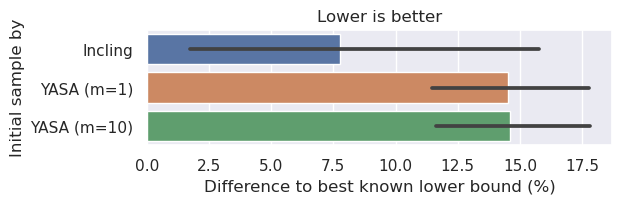

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
f, ax = plt.subplots(figsize=(6, 1.5))
plt.title("Lower is better")
sns.barplot(
    data=samplns_data.dropna(subset=["gap"]), y="initial_sample_name", x="gap", ax=ax
)
plt.xlabel("Difference to best known lower bound (%)")
plt.ylabel("Initial sample by")
plt.show()